In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pymongo
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import math
from pymongo import MongoClient
from sklearn.preprocessing import StandardScaler

In [8]:
client = MongoClient("mongodb://192.168.1.32:27017/")
db = client.cricket_data
collection1 = db.match_data
df_t20 = pd.DataFrame(list(collection1.find({"MatchType":"T20","Gender":"male"})))

In [9]:
df_t20.head()

AwayTeam Gender           HomeTeam    MatchCity  \
0           Leicestershire   male   Northamptonshire  Northampton   
1          Perth Scorchers   male  Adelaide Strikers          NaN   
2            Gujarat Lions   male    Kings XI Punjab   Chandigarh   
3            Sydney Sixers   male  Adelaide Strikers          NaN   
4  Rising Pune Supergiants   male   Delhi Daredevils        Delhi   

                      MatchDate MatchId MatchType  \
0  [datetime.date(2016, 6, 26)]  947221       T20   
1   [datetime.date(2015, 1, 6)]  756769       T20   
2  [datetime.date(2016, 4, 11)]  980905       T20   
3  [datetime.date(2012, 1, 10)]  524936       T20   
4   [datetime.date(2016, 5, 5)]  980965       T20   

                                          MatchVenue          MoM  \
0                                      County Ground      JJ Cobb   
1                                      Adelaide Oval      GB Hogg   
2  Punjab Cricket Association IS Bindra Stadium, ...     AJ Finch   
3                                      Adelaide Oval  SNJ O'Keefe   
4                                   Feroz Shah Kotla    AM Rahane   

  TossDecision               TossWinner                      Umpires  \
0        field         Northamptonshire     [NGC Cowley, SA Garratt]   
1        field        Adelaide Strikers       [GC Joshua, DB Mealey]   
2        field            Gujarat Lions  [AK Chaudhary, VA Kulkarni]   
3          bat            Sydney Sixers      [AJ Barrow, MD Martell]   
4        field  Rising Pune Supergiants   [C Shamshuddin, RJ Tucker]   

          WinType                   Winner                       _id  
0  {'wickets': 6}         Northamptonshire  5c41aa4f23099c0a32221b72  
1    {'runs': 18}          Perth Scorchers  5c41aa5523099c0a32221b75  
2  {'wickets': 5}            Gujarat Lions  5c41aa5723099c0a32221b77  
3    {'runs': 64}            Sydney Sixers  5c41aa5723099c0a32221b78  
4  {'wickets': 7}  Rising Pune Supergiants  5c41aa5b23099c0a32221b7b

In [12]:
df_india=df_t20.query('HomeTeam == "India"')
print(len(df_india))

49


In [75]:
T20_matches = list(df_india['MatchId'])
collection2 = db.deliveries
t20 = pd.DataFrame(list(collection2.find({'MatchId':{'$in':T20_matches}})))
t20=t20.query('Innings==1')

In [76]:
t20.head()

Ball        Batsman   Bowler  Innings MatchId      Nonstrike  Over  \
0    1     TM Dilshan  A Nehra        1  430885  ST Jayasuriya     0   
1    2  ST Jayasuriya  A Nehra        1  430885     TM Dilshan     0   
2    3  ST Jayasuriya  A Nehra        1  430885     TM Dilshan     0   
3    4  ST Jayasuriya  A Nehra        1  430885     TM Dilshan     0   
4    5  ST Jayasuriya  A Nehra        1  430885     TM Dilshan     0   

  Player_Out  Run_Batsman  Run_Extras  Total_Runs Wicket_Kind Wicket_taken_By  \
0        NaN            1           0           1         NaN             NaN   
1        NaN            4           0           4         NaN             NaN   
2        NaN            0           1           1         NaN             NaN   
3        NaN            0           0           0         NaN             NaN   
4        NaN            4           0           4         NaN             NaN   

                        _id  
0  5c079ed123099c0b40b49f13  
1  5c079ed123099c0b40b49f14  
2  5c079ed123099c0b40b49f15  
3  5c079ed123099c0b40b49f16  
4  5c079ed123099c0b40b49f17

In [77]:
wk=[]
for i in t20['Wicket_Kind']:
    if i=='NaN':
        wk.append(0)
    else:
        wk.append(1)
new_row = pd.Series(wk)
t20['Wicket'] = new_row.values
t20.head(100)

Ball           Batsman        Bowler  Innings MatchId         Nonstrike  \
0     1        TM Dilshan       A Nehra        1  430885     ST Jayasuriya   
1     2     ST Jayasuriya       A Nehra        1  430885        TM Dilshan   
2     3     ST Jayasuriya       A Nehra        1  430885        TM Dilshan   
3     4     ST Jayasuriya       A Nehra        1  430885        TM Dilshan   
4     5     ST Jayasuriya       A Nehra        1  430885        TM Dilshan   
5     6     ST Jayasuriya       A Nehra        1  430885        TM Dilshan   
6     7     ST Jayasuriya       A Nehra        1  430885        TM Dilshan   
7     1        TM Dilshan      I Sharma        1  430885     ST Jayasuriya   
8     2        TM Dilshan      I Sharma        1  430885     ST Jayasuriya   
9     3     KC Sangakkara      I Sharma        1  430885     ST Jayasuriya   
10    4     KC Sangakkara      I Sharma        1  430885     ST Jayasuriya   
11    5     ST Jayasuriya      I Sharma        1  430885     KC Sangakkara   
12    6     ST Jayasuriya      I Sharma        1  430885     KC Sangakkara   
13    7     ST Jayasuriya      I Sharma        1  430885     KC Sangakkara   
14    1     KC Sangakkara       S Tyagi        1  430885     ST Jayasuriya   
15    2     KC Sangakkara       S Tyagi        1  430885     ST Jayasuriya   
16    3     KC Sangakkara       S Tyagi        1  430885     ST Jayasuriya   
17    4     KC Sangakkara       S Tyagi        1  430885     ST Jayasuriya   
18    5     KC Sangakkara       S Tyagi        1  430885     ST Jayasuriya   
19    6     KC Sangakkara       S Tyagi        1  430885     ST Jayasuriya   
20    7     KC Sangakkara       S Tyagi        1  430885     ST Jayasuriya   
21    1     ST Jayasuriya      I Sharma        1  430885     KC Sangakkara   
22    2     ST Jayasuriya      I Sharma        1  430885     KC Sangakkara   
23    3     KC Sangakkara      I Sharma        1  430885     ST Jayasuriya   
24    4     KC Sangakkara      I Sharma        1  430885     ST Jayasuriya   
25    5     KC Sangakkara      I Sharma        1  430885     ST Jayasuriya   
26    6     KC Sangakkara      I Sharma        1  430885     ST Jayasuriya   
27    7     KC Sangakkara      I Sharma        1  430885     ST Jayasuriya   
28    1     ST Jayasuriya       A Nehra        1  430885     KC Sangakkara   
29    2     ST Jayasuriya       A Nehra        1  430885     KC Sangakkara   
..  ...               ...           ...      ...     ...               ...   
70    2     CU Jayasinghe  Yuvraj Singh        1  430885     KC Sangakkara   
71    3     KC Sangakkara  Yuvraj Singh        1  430885     CU Jayasinghe   
72    4     KC Sangakkara  Yuvraj Singh        1  430885     CU Jayasinghe   
73    5     KC Sangakkara  Yuvraj Singh        1  430885     CU Jayasinghe   
74    6     KC Sangakkara  Yuvraj Singh        1  430885     CU Jayasinghe   
75    1  DPMD Jayawardene     RA Jadeja        1  430885     CU Jayasinghe   
76    2  DPMD Jayawardene     RA Jadeja        1  430885     CU Jayasinghe   
77    3     CU Jayasinghe     RA Jadeja        1  430885  DPMD Jayawardene   
78    4     CU Jayasinghe     RA Jadeja        1  430885  DPMD Jayawardene   
79    5     CU Jayasinghe     RA Jadeja        1  430885  DPMD Jayawardene   
80    6     CU Jayasinghe     RA Jadeja        1  430885  DPMD Jayawardene   
81    1  DPMD Jayawardene      I Sharma        1  430885     CU Jayasinghe   
82    2  DPMD Jayawardene      I Sharma        1  430885     CU Jayasinghe   
83    3  DPMD Jayawardene      I Sharma        1  430885     CU Jayasinghe   
84    4     CU Jayasinghe      I Sharma        1  430885  DPMD Jayawardene   
85    5  DPMD Jayawardene      I Sharma        1  430885     CU Jayasinghe   
86    6  DPMD Jayawardene      I Sharma        1  430885     CU Jayasinghe   
87    7     CU Jayasinghe      I Sharma        1  430885     CK Kapugedera   
88    1     CU Jayasinghe     RA Jadeja        1  430885     CK Kapugedera   
89    2     CU Jayasinghe

In [51]:
data=t20.groupby(['MatchId']).aggregate({'Total_Runs':'sum'}).reset_index()
data.rename(columns={'Total_Runs':'Final_Score'},inplace=True)

In [52]:
data.head()

MatchId  Final_Score
0  1034825          154
1  1034827          150
2  1034829          210
3  1041615          249
4  1041617          145

In [81]:
data2

MatchId  Over  Ball  Wicket  Total_Runs  Balls_Remaining  Current_Score  \
0    1034825     0     6       0           9              114              9   
1    1034825     1     8       0           7              108             16   
2    1034825     2     7       0           6              102             22   
3    1034825     3     6       0          11               96             33   
4    1034825     4     6       1           3               90             36   
5    1034825     5     6       0          11               84             47   
6    1034825     6     7       0           8               78             55   
7    1034825     7     6       1           4               72             59   
8    1034825     8     7       0          10               66             69   
9    1034825     9     6       0           7               60             76   
10   1034825    10     6       1           8               54             84   
11   1034825    11     6       0           6               48             90   
12   1034825    12     6       0          10               42            100   
13   1034825    13     6       1           5               36            105   
14   1034825    14     6       0           3               30            108   
15   1034825    15     9       0          11               24            119   
16   1034825    16     6       1           6               18            125   
17   1034825    17     6       0           6               12            131   
18   1034825    18     6       0           7                6            138   
19   1034825    19     6       1          16                0            154   
20   1034827     0     6       0           5              114              5   
21   1034827     1     6       0           5              108             10   
22   1034827     2     6       0           5              102             15   
23   1034827     3     6       0          15               96             30   
24   1034827     4     6       1           9               90             39   
25   1034827     5     7       0           9               84             48   
26   1034827     6     7       0           8               78             56   
27   1034827     7     6       1           3               72             59   
28   1034827     8     6       0           1               66             60   
29   1034827     9     6       0          10               60             70   
..       ...   ...   ...     ...         ...              ...            ...   
939   966757    10     6       0          10               54             59   
940   966757    11     7       0           5               48             64   
941   966757    12     6       0          13               42             77   
942   966757    13     6       0           9               36             86   
943   966757    14     6       0           7               30             93   
944   966757    15     6       0           9               24            102   
945   966757    16     7       2           7               18            109   
946   966757    17     6       1          12               12            121   
947   966757    18     7       1          12                6            133   
948   966757    19     6       1          10                0            143   
949   966761     0     6       0           0              114              0   
950   966761     1     6       0           1              108              1   
951   966761     2     6       0           0              102              1   
952   966761     3     7       1           6               96              7   
953   966761     4     7       0           7               90             14   
954   966761     5     6       0           7               84             21   
955   966761     6     7       0           4               78             25   
956   966761     7     6       0           0               72             25   
957  

In [83]:
data2=t20.groupby(['MatchId','Over']).aggregate({'Ball':'count','Wicket':'sum','Total_Runs':'sum'}).reset_index()
br=[]

for i in range(len(data2)):
    br.append((120-(data2['Over'][i])*6)-6)
se = pd.Series(br)
data2['Balls_Remaining']=se.values

cr=[]
run=0
for i in range(len(data2)-1):
    run = run+data2['Total_Runs'][i]
    cr.append(run)
    
    if data2['Over'][i]>data2['Over'][i+1]:
        run=0

cr.append(run+data2['Total_Runs'][len(data2)-1])
new_row = pd.Series(cr)
data2['Current_Score'] = new_row.values
data2['Runs_Per_Over'] = data2['Total_Runs']/data2['Ball']

wkt=[]
add=0
for i in range(len(data2)-1):
    add=add+data2['Wicket'][i]
    wkt.append(add)

    if data2['Over'][i] > data2['Over'][i+1]:
        add=0
wkt.append(wkt[-1]+data2['Wicket'][len(data2)-1])
new_row=pd.Series(wkt)
data2['Wickets_Fallen']=new_row.values
data2=pd.merge(data2,data,on='MatchId',how='left')
data2['Runs_Capacity']=data2['Final_Score']-data2['Current_Score']

In [84]:
data2.head()

MatchId  Over  Ball  Wicket  Total_Runs  Balls_Remaining  Current_Score  \
0  1034825     0     6       0           9              114              9   
1  1034825     1     8       0           7              108             16   
2  1034825     2     7       0           6              102             22   
3  1034825     3     6       0          11               96             33   
4  1034825     4     6       1           3               90             36   

   Runs_Per_Over  Wickets_Fallen  Final_Score  Runs_Capacity  
0       1.500000               0          154            145  
1       0.875000               0          154            138  
2       0.857143               0          154            132  
3       1.833333               0          154            121  
4       0.500000               1          154            118

In [22]:
teams_data = df_india[['MatchId','AwayTeam','MatchVenue']]
teams_data['MatchVenue'].unique()

array(['Punjab Cricket Association Stadium, Mohali',
       'Himachal Pradesh Cricket Association Stadium', 'Wankhede Stadium',
       'Shere Bangla National Stadium',
       'Maharashtra Cricket Association Stadium',
       'Subrata Roy Sahara Stadium', 'Kingsmead',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Trent Bridge', 'Saurashtra Cricket Association Stadium',
       'New Wanderers Stadium', 'Eden Gardens', 'Brabourne Stadium',
       'MA Chidambaram Stadium, Chepauk', 'R Premadasa Stadium',
       'Sardar Patel Stadium, Motera', "Lord's",
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'M Chinnaswamy Stadium', 'Barabati Stadium',
       'Beausejour Stadium, Gros Islet',
       'Central Broward Regional Park Stadium Turf Ground', 'Green Park',
       'JSCA International Stadium Complex'], dtype=object)

In [23]:
data2 = pd.merge(data2,teams_data,on='MatchId',how='left')

In [26]:
data2.head()

MatchId  Over  Ball  Wicket  Total_Runs  Balls_Remaining  Current_Score  \
0  1034825     0     6       0           9              114              9   
1  1034825     1     8       0           7              108             16   
2  1034825     2     7       0           6              102             22   
3  1034825     3     6       0          11               96             33   
4  1034825     4     6       1           3               90             36   

   Runs_Per_Over  Wickets_Fallen  Final_Score  Runs_Capacity AwayTeam  \
0       1.500000               0          154            145  England   
1       0.875000               0          154            138  England   
2       0.857143               0          154            132  England   
3       1.833333               0          154            121  England   
4       0.500000               1          154            118  England   

   MatchVenue  
0  Green Park  
1  Green Park  
2  Green Park  
3  Green Park  
4  Green Park

In [35]:
data2.columns

Index(['MatchId', 'Over', 'Ball', 'Wicket', 'Total_Runs', 'Balls_Remaining',
       'Current_Score', 'Runs_Per_Over', 'Wickets_Fallen', 'Final_Score',
       'Runs_Capacity', 'AwayTeam', 'MatchVenue'],
      dtype='object')

In [40]:
dummies = data2['MatchVenue'].str.get_dummies()
ndf = pd.concat([data2.drop(['MatchVenue'],axis=1),dummies],axis=1)
dummies2 = data2['AwayTeam'].str.get_dummies()
ndf = pd.concat([ndf.drop(['AwayTeam'],1),dummies2],1)

In [41]:
ndf.columns

Index(['MatchId', 'Over', 'Ball', 'Wicket', 'Total_Runs', 'Balls_Remaining',
       'Current_Score', 'Runs_Per_Over', 'Wickets_Fallen', 'Final_Score',
       'Runs_Capacity', 'Barabati Stadium', 'Beausejour Stadium, Gros Islet',
       'Brabourne Stadium',
       'Central Broward Regional Park Stadium Turf Ground',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Eden Gardens',
       'Green Park', 'Himachal Pradesh Cricket Association Stadium',
       'JSCA International Stadium Complex', 'Kingsmead', 'Lord's',
       'M Chinnaswamy Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Maharashtra Cricket Association Stadium', 'New Wanderers Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Punjab Cricket Association Stadium, Mohali', 'R Premadasa Stadium',
       'Sardar Patel Stadium, Motera',
       'Saurashtra Cricket Association Stadium',
       'Shere Bangla National Stadium', 'Subrata Roy Sahara Stadium',
       'Trent Bridge', 'Vidar

In [46]:
labels=np.array(ndf['Runs_Capacity']).reshape(-1,1)
features = ndf.drop(['Runs_Capacity', 'MatchId'],axis=1)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20)

features.head()

Over  Ball  Wicket  Total_Runs  Balls_Remaining  Current_Score  \
0     0     6       0           9              114              9   
1     1     8       0           7              108             16   
2     2     7       0           6              102             22   
3     3     6       0          11               96             33   
4     4     6       1           3               90             36   

   Runs_Per_Over  Wickets_Fallen  Final_Score  Barabati Stadium  ...  \
0       1.500000               0          154                 0  ...   
1       0.875000               0          154                 0  ...   
2       0.857143               0          154                 0  ...   
3       1.833333               0          154                 0  ...   
4       0.500000               1          154                 0  ...   

   Australia  Bangladesh  England  Ireland  New Zealand  Pakistan  \
0          0           0        1        0            0         0   
1          0           0        1        0            0         0   
2          0           0        1        0            0         0   
3          0           0        1        0            0         0   
4          0           0        1        0            0         0   

   South Africa  Sri Lanka  United Arab Emirates  West Indies  
0             0          0                     0            0  
1             0          0                     0            0  
2             0          0                     0            0  
3             0          0                     0            0  
4             0          0                     0            0  

[5 rows x 44 columns]

In [53]:
def predict_method(feature_train, label_train, feature_test, label_test, model):
    model.fit(feature_train,label_train)
    predict_output = model.predict(feature_test)
    return r2_score(label_test,predict_output), predict_output

In [68]:
r2score_dtr, pred_dtr = predict_method(features_train,labels_train,features_test,labels_test, DecisionTreeRegressor())
print('DecisionTreeRegressor - ',math.sqrt(mean_squared_error(labels_test,pred_dtr)))
print('r2_score - ',r2score_dtr)

r2score_rft, pred_rft = predict_method(features_train,labels_train,features_test,labels_test, RandomForestRegressor(n_estimators=100))
print('RandomForestTree - ',math.sqrt(mean_squared_error(labels_test,pred_rft)))
print('r2_score - ',r2score_rft)

DecisionTreeRegressor -  8.4946920965055
r2_score -  0.9716153246389475


C:\Users\Ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestTree -  4.279033094847962
r2_score -  0.9927975551962508


In [57]:
rf = RandomForestRegressor(n_estimators=100).fit(features_train, labels_train)
feats = {}

for feature, importance in zip(features_train.columns, rf.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient = 'index').rename(columns={0: 'Importance'})

C:\Users\Ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [85]:
importances.sort_values(['Importance'], ascending=False)

Importance
Over                                                  0.388390
Balls_Remaining                                       0.327750
Final_Score                                           0.209382
Current_Score                                         0.062691
Wickets_Fallen                                        0.003011
Runs_Per_Over                                         0.001705
Total_Runs                                            0.001418
West Indies                                           0.000545
Vidarbha Cricket Association Stadium, Jamtha          0.000543
Ball                                                  0.000487
Central Broward Regional Park Stadium Turf Ground     0.000438
Wicket                                                0.000384
England                                               0.000306
Pakistan                                              0.000264
South Africa                                          0.000229
Shere Bangla National Stadium                         0.000229
Sri Lanka                                             0.000216
Beausejour Stadium, Gros Islet                        0.000172
Wankhede Stadium                                      0.000155
M Chinnaswamy Stadium                                 0.000140
Maharashtra Cricket Association Stadium               0.000140
JSCA International Stadium Complex                    0.000126
Australia                                             0.000118
Trent Bridge                                          0.000112
MA Chidambaram Stadium, Chepauk                       0.000088
Punjab Cricket Association Stadium, Mohali            0.000085
Lord's                                                0.000082
New Wanderers Stadium                                 0.000078
Kingsmead                                             0.000073
New Zealand                                           0.000068
Eden Gardens                                          0.000068
Subrata Roy Sahara Stadium                            0.000062
United Arab Emirates                                  0.000059
Saurashtra Cricket Association Stadium                0.000050
R Premadasa Stadium                                   0.000049
Ireland                                               0.000048
Bangladesh                                            0.000041
Punjab Cricket Association IS Bindra Stadium, M...    0.000040
Barabati Stadium                                      0.000038
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...    0.000031
Himachal Pradesh Cricket Association Stadium          0.000031
Sardar Patel Stadium, Motera                          0.000025
Brabourne Stadium                                     0.000022
Green Park                                            0.000014

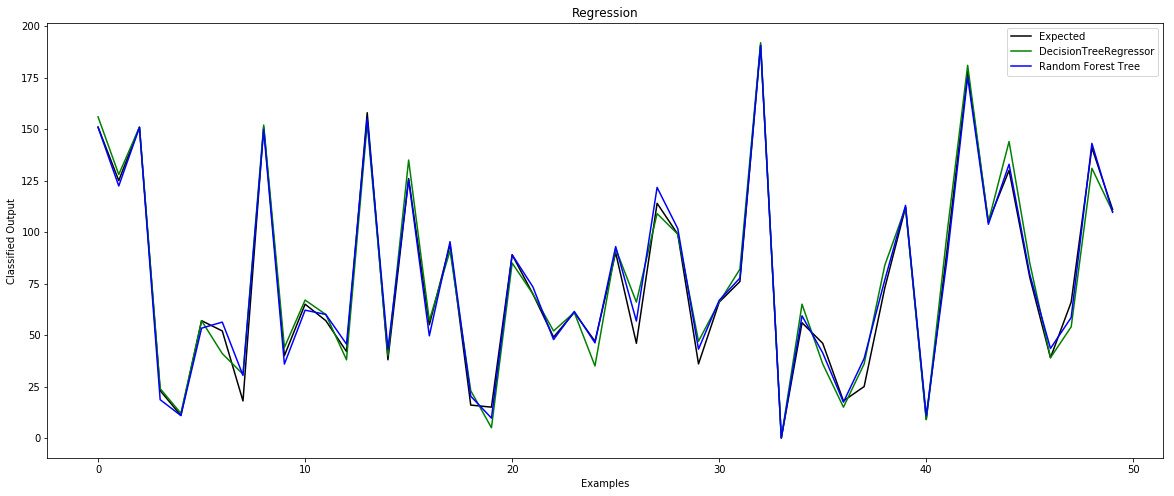

In [71]:
plt.figure(figsize=(20,8))
plt.plot(range(0,len(labels_test))[:50], labels_test[:50], color='black', label='Expected')
plt.plot(range(0,len(labels_test))[:50], pred_dtr[:50], color='green', label='DecisionTreeRegressor')
plt.plot(range(0,len(labels_test))[:50], pred_rft[:50], color='blue', label='Random Forest Tree')
plt.title("Regression")
plt.xlabel("Examples")
plt.ylabel("Classified Output")
plt.legend()
plt.show()

In [40]:
sns.heatmap(features.corr(),annot=True)

In [41]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
labels = scaler.fit_transform(labels)
features_train, features_test, labels_train,labels_test = train_test_split(features, labels, test_size=0.20)

C:\Users\ADITUDE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ADITUDE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


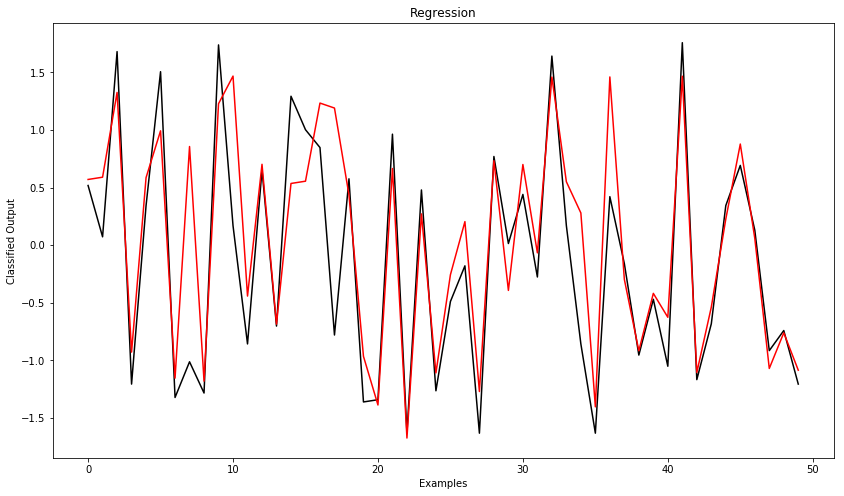

In [46]:
plt.figure(figsize=(14,8))
plt.plot(range(0,len(labels_test))[:50], labels_test[:50], color='black', label='Expected')
plt.plot(range(0,len(labels_test))[:50], pred_linear[:50], color='red', label='Linear')
plt.title("Regression")
plt.xlabel("Examples")
plt.ylabel("Classified Output")
plt.legend
plt.show()